In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
import os

In [9]:
os.chdir("/Users/shree/Desktop/MLP")

In [10]:
os.listdir()

['train_u6lujuX_CVtuZ9i (1).csv']

In [11]:
LoanData= pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")

In [14]:
LoanData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
LoanData.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [16]:
LoanData.shape

(614, 13)

In [17]:
LoanData.size

7982

In [18]:
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [19]:
LoanData.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
LoanData.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [21]:
LoanData.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
LoanData.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [24]:
len(LoanData.columns)

13

In [27]:
LoanData.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [28]:
LoanData.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [30]:
LoanData.dropna(axis=0, inplace= True)

In [31]:
LoanData.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
LoanData.shape

(480, 13)

In [33]:
LoanData.size

6240

In [40]:
LoanData.Dependents.unique()

array(['1', '0', '2', '3+'], dtype=object)

In [37]:
LoanData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [47]:
LoanData.Property_Area.unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [44]:
from sklearn.model_selection import train_test_split
X= LoanData.drop(['Loan_Status'], axis=1)
y= LoanData['Loan_Status']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.preprocessing import LabelEncoder

In [51]:
A = ['ApplicantIncome' , 'CoapplicantIncome' , 'LoanAmount' , 'Loan_Amount_Term']

B = ['Gender' , 'Married' , 'Dependents' , 'Education' , 'Self_Employed' , 'Credit_History' , 'Property_Area']

In [53]:
le = LabelEncoder()
X_train[B] = X_train[B].apply(le.fit_transform)

/Users/shree/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [54]:
X_train[B].head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
52,0,0,0,0,0,1,1
439,0,1,0,1,1,1,0
276,1,1,0,0,0,1,1
438,1,0,0,0,1,0,2
208,1,0,0,0,0,1,2


In [55]:
ss = StandardScaler()
ss.fit_transform(X_train[A])

array([[-0.21848915, -0.59611605, -0.43130655,  0.27219883],
       [ 0.24953542, -0.59611605, -0.10956682,  0.27219883],
       [-0.25658043,  0.71771761,  0.74428094,  0.27219883],
       ...,
       [ 1.23315848, -0.59611605, -1.32227812,  0.27219883],
       [-0.14841404, -0.59611605, -0.14669063,  0.27219883],
       [-0.58847286,  0.06360983, -0.57980181,  0.27219883]])

In [57]:
a = X_train[B]
b = ss.transform(X_train[A])
R = np.hstack([a,b])
R.shape 

(336, 11)

In [59]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(R, y_train)

KNeighborsClassifier(metric='euclidean')

In [60]:
ss = StandardScaler()
ss.fit_transform(X_test[A])
le = LabelEncoder()
X_test[B] = X_test[B].apply(le.fit_transform)

/Users/shree/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [62]:
a1 = X_test[B]
b1 = ss.transform(X_test[A])
R1 = np.hstack([a1,b1]) 
R1.shape 

(144, 11)

In [65]:
y_pred = knn.predict(R1)
confusion_matrix(y_test, y_pred)

array([[11, 40],
       [ 7, 86]])

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6736111111111112

In [67]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred)

(array([0.61111111, 0.68253968]),
 array([0.21568627, 0.92473118]),
 array([0.31884058, 0.78538813]),
 array([51, 93]))

In [68]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, pos_label="Y")

0.6825396825396826

In [69]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, pos_label='Y') 

0.9247311827956989

In [70]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, pos_label='Y')

0.7853881278538812

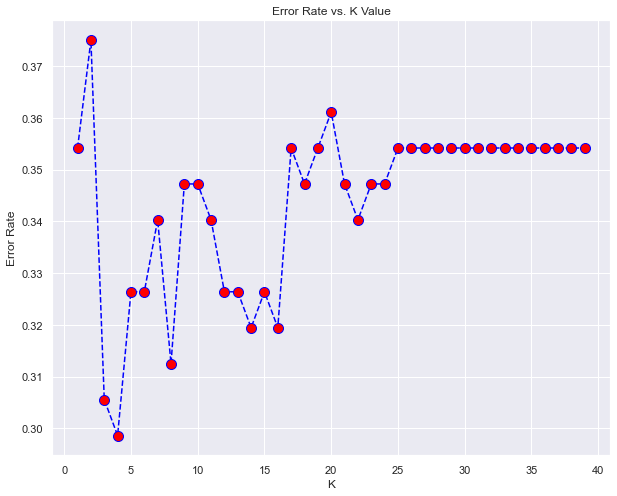

Minimum error:- 0.29861111111111116 at K = 4


In [73]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(R,y_train)
 pred_i = knn.predict(R1)
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,8))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [81]:
knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(R,y_train)
yPred = knn.predict(R1)
accuracy_score(y_test, y_pred)

0.6736111111111112